# K-Nearest Neighbours (KNN) Classifier

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv('./data/cardataset/data.csv')

Standard Scaler


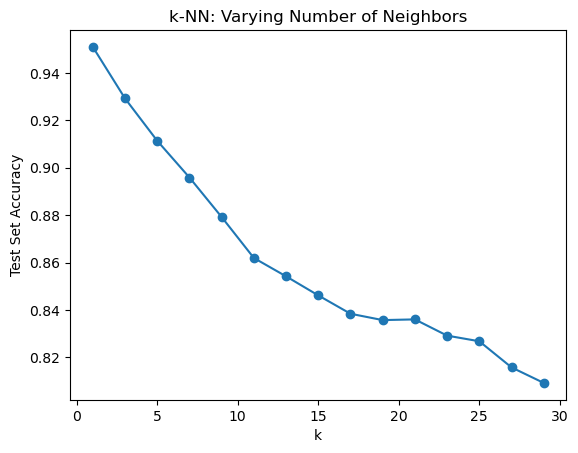

The best value for k is: 1 with accuracy 0.95
Best k for standard scaled data: 1

MinMax Scaler


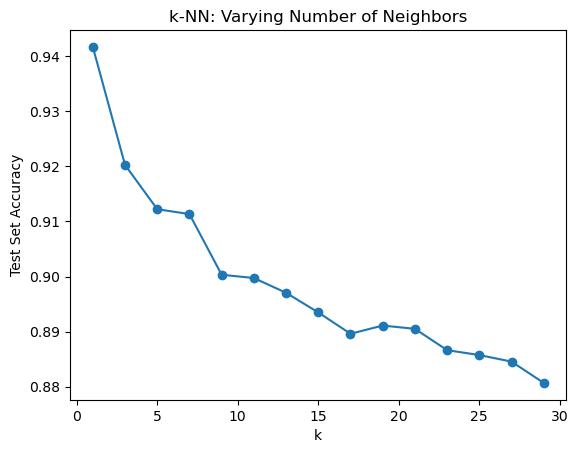

The best value for k is: 1 with accuracy 0.94
Best k for minmax scaled data: 1


In [6]:
def preprocess_data_for_knn(data):
    values = ['AUTOMATED_MANUAL', 'DIRECT_DRIVE', 'UNKNOWN']
    data = data[~data['Transmission Type'].isin(values)].copy()

    data.loc[:, 'Engine Fuel Type'] = data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0])
    data.loc[:, 'Engine HP'] = data['Engine HP'].fillna(data['Engine HP'].mean())
    data.loc[:, 'Engine Cylinders'] = data['Engine Cylinders'].fillna(data['Engine Cylinders'].mode()[0])
    data.loc[:, 'Number of Doors'] = data['Number of Doors'].fillna(data['Number of Doors'].mean())
    data.loc[:, 'Market Category'] = data['Market Category'].fillna(data['Market Category'].mode()[0])

    data.loc[:, 'Year'] = data['Year'].fillna(data['Year'].mode()[0])
    data.loc[:, 'highway MPG'] = data['highway MPG'].fillna(data['highway MPG'].mean())
    data.loc[:, 'city mpg'] = data['city mpg'].fillna(data['city mpg'].mean())
    data.loc[:, 'MSRP'] = data['MSRP'].fillna(data['MSRP'].mean())

    data.loc[:, 'Engine Fuel Type'] = data['Engine Fuel Type'].str.replace(r"\(.*\)", "", regex=True)
    
    data = pd.get_dummies(data, columns=['Engine Fuel Type', 'Driven_Wheels', 'Vehicle Size', 'Make', 'Model', 'Market Category', 'Vehicle Style'], dtype=int)
    
    data.loc[:, 'Transmission Type'] = data['Transmission Type'].map({'AUTOMATIC': 0, 'MANUAL': 1})
    data['Transmission Type'] = data['Transmission Type'].astype(int)

    data.dropna(inplace=True)

    return pd.DataFrame(data, columns=data.columns)


def scale_data(data, scaler: str):
    if scaler == 'minmax':
        scaler = MinMaxScaler()
    elif scaler == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid scaler type. Use 'minmax' or 'standard'.")
    
    data_scaled = scaler.fit_transform(data)
    
    return pd.DataFrame(data_scaled, columns=data.columns)

def train_model(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)

    if X_train.isna().sum().sum() > 0 or X_test.isna().sum().sum() > 0:
        raise ValueError("NaN values present after train-test split.")
    k_values = list(range(1, 30, 2))
    test_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        #test_accuracy = knn.score(X_test, y_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_accuracies.append(test_accuracy)

    plt.plot(k_values, test_accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('Test Set Accuracy')
    plt.title('k-NN: Varying Number of Neighbors')
    plt.show()
    
    best_k = k_values[test_accuracies.index(max(test_accuracies))]
    print(f"The best value for k is: {best_k} with accuracy {max(test_accuracies):.2f}")

    return best_k

car_data_standard = preprocess_data_for_knn(car_data)
car_data_minmax = preprocess_data_for_knn(car_data)

X_stand = car_data_standard.drop(columns=['Transmission Type'])
X_minmax = car_data_minmax.drop(columns=['Transmission Type'])

y_stand = car_data_standard['Transmission Type']
y_minmax = car_data_minmax['Transmission Type']

X_stand = scale_data(X_stand, 'standard')
X_minmax = scale_data(X_minmax, 'minmax')




print("Standard Scaler")
print(f"Best k for standard scaled data: {train_model(X_stand, y_stand)}")
print("\nMinMax Scaler")
print(f"Best k for minmax scaled data: {train_model(X_minmax, y_minmax)}")

